In [3]:
library(SpatialPCA)
library(ggplot2)



In [4]:

cd <- read.csv('countsCbyG.csv', row.names = 1)
annot <- read.csv('meta.csv', row.names = 1)
pos <- annot[, c('x', 'y')]
#pos[,2] <- -pos[,2] ## flip Y coordinates for better visualization
location = as.matrix(pos)
#raw_matrix = t(cd[,1:483])
raw_matrix = t(cd)


In [5]:
#load("./example_data/BreastTumor/Tumor_data.RData") 
print(dim(raw_matrix)) # The count matrix
print(dim(location)) # The location matrix



[1]   550 44699
[1] 44699     2


In [6]:
# location matrix: n x 2, count matrix: g x n.
# here n is spot number, g is gene number.
# here the column names of sp_count and rownames of location should be matched

#This one is getting crashed 
#ST = CreateSpatialPCAObject(counts=raw_matrix, location=location, project = "SpatialPCA",
#                            gene.type="spatial",sparkversion="spark", gene.number=3000,
#                            customGenelist=NULL,min.loctions = 20, min.features=20)


ST = CreateSpatialPCAObject(counts=raw_matrix, location=location, project = "SpatialPCA",gene.type="spatial",
                                sparkversion="sparkx", gene.number=3000,customGenelist=NULL,min.loctions = 50, min.features=85) 
# Here I filtered genes and locations with a stringent cut-off to reduce the sample size and quickly obtain the results, 
# you can also set a more relaxed cut-off here and get a larger sample size.



Warning message:
“Data is of class matrix. Coercing to dgCMatrix.”


## Use SCTransform function in Seurat to normalize data. 


Running SCTransform on assay: RNA

Running SCTransform on layer: counts

vst.flavor='v2' set. Using model with fixed slope and excluding poisson genes.

Variance stabilizing transformation of count matrix of size 550 by 42312

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 550 genes, 5000 cells

Found 9 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 550 genes

Computing corrected count matrix for 550 genes

Calculating gene attributes

Wall clock passed: Time difference of 6.325385 secs

Determine variable features

Centering data matrix

Getting residuals for block 1(of 9) for counts dataset

Getting residuals for block 2(of 9) for counts dataset

Getting residuals for block 3(of 9) for counts dataset

Getting residuals for block 4(of 9) for counts dataset

Getting residuals for block 5(of 9) for counts dataset

Getting residuals for block 6(of 9) for counts dataset

Ge

## Use sparkx function in SPARK to select spatially variable genes. 
## ===== SPARK-X INPUT INFORMATION ==== 
## number of total samples: 42312 
## number of total genes: 550 
## Running with single core, may take some time 
## Testing With Projection Kernel
## Testing With Gaussian Kernel 1
## Testing With Gaussian Kernel 2
## Testing With Gaussian Kernel 3
## Testing With Gaussian Kernel 4
## Testing With Gaussian Kernel 5
## Testing With Cosine Kernel 1
## Testing With Cosine Kernel 2
## Testing With Cosine Kernel 3
## Testing With Cosine Kernel 4
## Testing With Cosine Kernel 5
## Identified  535  spatial genes through SPARK-X function. 
The  number of significant spatial genes is less than the specified number of spatial genes. 
## Using  535  significant spatially variable genes. 


In [7]:
ST = SpatialPCA_buildKernel(ST, kerneltype="gaussian", bandwidth.set.by.user=0.1,sparseKernel_tol=1e-5)
ST = SpatialPCA_EstimateLoading(ST,fast=TRUE,SpatialPCnum=20)
ST = SpatialPCA_SpatialPCs(ST, fast=TRUE)





## Selected kernel type is:  gaussian  
## The bandwidth is:  0.1  
## Calculating kernel matrix
## Finished calculating kernel matrix.
[1] "Eigen decomposition on kernel matrix!"
[1] "Low rank approximation!"
[1] "Large sample, using top 20 eigenvectors and eigenvalues in the Kernel matrix!"
[1] "Low rank approximation!"
[1] "Large sample, using top 10% sample size of eigenvectors and eigenvalues in the Kernel matrix!"


In [8]:
# depends upon we want fast or slow clustering 
clusterlabel= louvain_clustering(clusternum=6,latent_dat=ST@SpatialPCs,
                                 knearest=round(sqrt(dim(ST@location)[1])) )

In [11]:
#clusterlabel= walktrap_clustering(6, ST@SpatialPCs,round(sqrt(dim(ST@location)[1])))
clusterlabel_refine=refine_cluster_10x(clusterlabel,ST@location,shape="square")

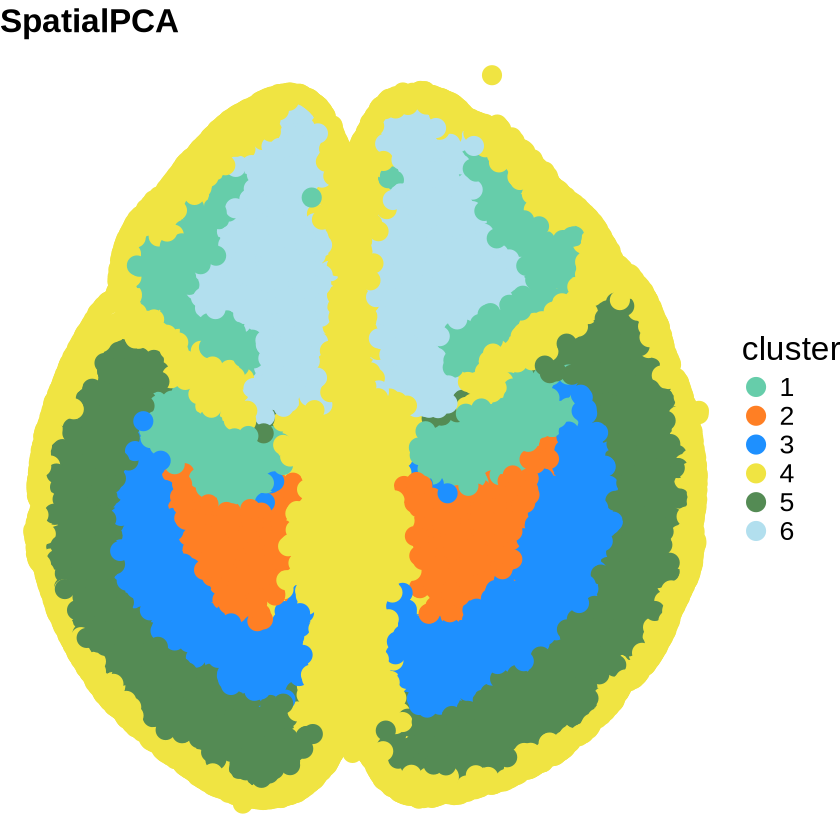

In [12]:
# set color
cbp_spatialpca = c(  "mediumaquamarine", "chocolate1","dodgerblue",  "#F0E442","palegreen4","lightblue2") #"plum1"
# visualize the cluster
plot_cluster(legend="right",location=ST@location,clusterlabel_refine,pointsize=5,text_size=20 ,
             title_in=paste0("SpatialPCA"),color_in=cbp_spatialpca)

Loading required package: assertthat



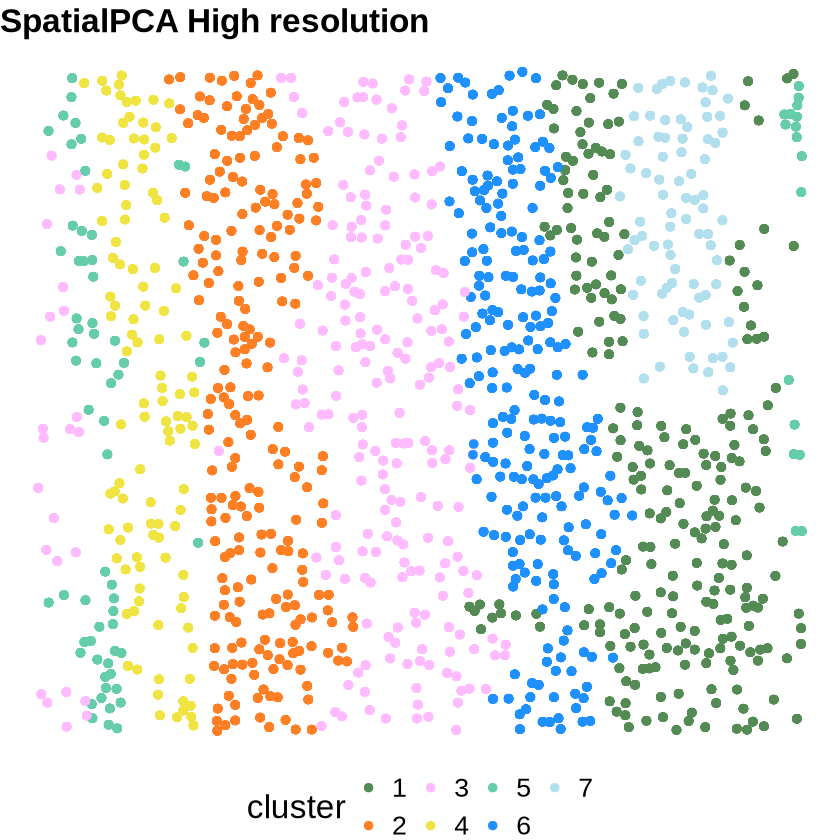

In [8]:
STsimu_high_ST = SpatialPCA_highresolution(ST, platform="ST",newlocation=NULL)
cluster_SpatialPCA_high = walktrap_clustering(7, latent_dat=STsimu_high_ST@highPCs,200)
color_in=c(  "palegreen4", "chocolate1","plum1",  "#F0E442","mediumaquamarine","dodgerblue","lightblue2")
title_in="SpatialPCA High resolution"
plot_cluster(STsimu_high_ST@highPos, as.character(cluster_SpatialPCA_high), 
             pointsize=2,text_size=20 ,title_in,color_in,legend="bottom")

In [17]:
length(clusterlabel_refine)

[1] 1207

In [18]:
length(cluster_SpatialPCA_high)

[1] 10863

In [19]:
cluster_SpatialPCA_high

[1] "2" "6" "1" "2" "3" "2" "1" "2" "3" "5" "6" "1" "1" "1" "1" "2" "3" "4"
   [19] "5" "2" "6" "6" "2" "6" "6" "1" "1" "2" "1" "1" "6" "4" "3" "3" "3" "2"
   [37] "3" "5" "4" "4" "1" "6" "1" "1" "3" "1" "3" "1" "5" "4" "3" "6" "4" "2"
   [55] "5" "6" "1" "2" "3" "1" "3" "3" "5" "3" "1" "4" "1" "2" "6" "6" "2" "6"
   [73] "2" "2" "6" "2" "5" "1" "3" "1" "6" "6" "4" "3" "3" "2" "3" "1" "5" "3"
   [91] "3" "1" "2" "3" "5" "1" "3" "6" "6" "6" "1" "4" "4" "5" "2" "2" "3" "3"
  [109] "5" "6" "6" "6" "4" "3" "1" "2" "1" "2" "1" "1" "2" "1" "3" "4" "2" "3"
  [127] "3" "5" "2" "1" "2" "2" "2" "6" "1" "2" "1" "1" "3" "1" "3" "2" "5" "2"
  [145] "6" "6" "3" "6" "1" "2" "1" "6" "2" "3" "5" "3" "5" "5" "2" "2" "3" "1"
  [163] "4" "2" "3" "6" "1" "1" "1" "1" "2" "1" "1" "2" "1" "1" "2" "1" "3" "2"
  [181] "1" "1" "2" "1" "3" "2" "6" "5" "2" "2" "3" "3" "5" "1" "1" "1" "3" "1"
  [199] "1" "1" "1" "6" "1" "1" "4" "3" "1" "3" "1" "1" "2" "1" "5" "2" "1" "5"
  [217] "3" "4" "3" "2" "2" "2" "1" "2" "1" "1" "2" "2" "1" "2" "2" "2" "1" "1"
  [235] "3" "1" "4" "1" "1" "3" "1" "2" "4" "1" "5" "1" "6" "4" "6" "2" "1" "1"
  [253] "1" "1" "2" "1" "1" "2" "5" "1" "5" "1" "4" "2" "1" "5" "1" "6" "2" "2"
  [271] "1" "1" "1" "4" "3" "2" "2" "3" "5" "1" "1" "2" "4" "2" "1" "1" "6" "1"
  [289] "5" "3" "6" "2" "6" "6" "6" "2" "3" "2" "3" "1" "3" "1" "3" "1" "4" "3"
  [307] "3" "6" "6" "6" "5" "2" "3" "3" "3" "1" "4" "2" "4" "6" "1" "3" "6" "1"
  [325] "1" "6" "6" "1" "3" "3" "3" "1" "2" "4" "3" "4" "3" "4" "1" "6" "2" "2"
  [343] "3" "6" "2" "3" "6" "2" "6" "3" "2" "6" "3" "2" "3" "3" "1" "1" "1" "5"
  [361] "1" "2" "2" "3" "3" "6" "6" "4" "1" "2" "3" "1" "6" "6" "3" "2" "6" "4"
  [379] "2" "6" "6" "4" "3" "1" "5" "5" "6" "4" "6" "1" "4" "1" "4" "1" "4" "6"
  [397] "4" "2" "1" "2" "2" "3" "1" "6" "6" "2" "3" "1" "2" "3" "6" "6" "1" "1"
  [415] "1" "4" "6" "1" "3" "2" "2" "1" "2" "6" "3" "3" "4" "6" "2" "1" "2" "3"
  [433] "1" "6" "3" "4" "6" "3" "6" "2" "1" "2" "2" "6" "4" "6" "6" "6" "1" "2"
  [451] "4" "6" "1" "4" "3" "1" "2" "6" "1" "3" "1" "2" "6" "4" "1" "6" "6" "1"
  [469] "3" "6" "6" "6" "2" "6" "6" "1" "6" "1" "1" "3" "2" "4" "3" "2" "2" "6"
  [487] "6" "1" "1" "2" "1" "2" "6" "1" "1" "6" "6" "3" "3" "3" "1" "6" "3" "2"
  [505] "1" "1" "2" "3" "6" "5" "6" "1" "5" "5" "3" "6" "1" "6" "3" "2" "1" "6"
  [523] "1" "2" "3" "3" "3" "6" "1" "1" "3" "6" "3" "3" "4" "1" "3" "4" "2" "3"
  [541] "3" "1" "1" "6" "1" "6" "1" "3" "6" "6" "2" "4" "6" "1" "2" "3" "3" "3"
  [559] "4" "6" "1" "2" "6" "3" "3" "1" "1" "4" "1" "1" "4" "5" "5" "2" "6" "6"
  [577] "4" "2" "6" "6" "6" "1" "6" "4" "6" "3" "4" "3" "3" "2" "6" "4" "3" "1"
  [595] "3" "1" "2" "3" "3" "5" "6" "1" "1" "3" "3" "1" "2" "4" "4" "6" "3" "2"
  [613] "6" "3" "2" "2" "2" "4" "6" "3" "7" "4" "6" "1" "2" "6" "4" "2" "3" "3"
  [631] "3" "5" "6" "5" "4" "7" "3" "6" "4" "3" "2" "6" "6" "5" "6" "3" "6" "7"
  [649] "3" "3" "6" "3" "6" "2" "3" "7" "7" "7" "3" "2" "5" "3" "5" "3" "3" "5"
  [667] "6" "7" "7" "3" "5" "6" "7" "1" "3" "1" "4" "2" "3" "6" "2" "6" "6" "6"
  [685] "6" "3" "6" "3" "6" "5" "2" "2" "3" "6" "5" "3" "7" "1" "4" "4" "3" "5"
  [703] "6" "2" "3" "1" "3" "1" "4" "2" "2" "7" "1" "1" "4" "2" "3" "6" "5" "7"
  [721] "3" "3" "1" "3" "3" "6" "2" "6" "1" "5" "7" "6" "6" "2" "5" "3" "6" "2"
  [739] "7" "1" "1" "5" "3" "7" "4" "6" "7" "3" "2" "3" "3" "3" "6" "1" "4" "7"
  [757] "6" "3" "6" "3" "6" "7" "4" "6" "6" "2" "3" "1" "4" "4" "2" "3" "2" "2"
  [775] "2" "3" "7" "1" "3" "6" "1" "4" "3" "3" "7" "6" "7" "7" "3" "1" "3" "6"
  [793] "1" "3" "6" "3" "4" "1" "6" "4" "1" "3" "7" "1" "1" "2" "3" "6" "3" "3"
  [811] "6" "1" "7" "2" "7" "7" "2" "7" "2" "3" "3" "6" "5" "6" "6" "6" "6" "2"
  [829] "1" "1" "2" "3" "2" "3" "1" "3" "7" "4" "3" "4" "2" "4" "2" "5" "6" "1"
  [847] "5" "6" "5" "6" "7" "2" "3" "5" "3" "1" "2" "6" "3" "1" "2" "2" "4" "1"
  [865] "7" "2" "6" "2" "6" "5" "7" "6" "6" "2" "6" "7" "1" "7" "3" "1" "3" "7"
  [883] "4" "7" "2" "1" "6" "3" "7" "3" "3" "3" "3" "6" "1" "1" "2" "7" "1" "7"
  [9

In [13]:
write.csv(paste(clusterlabel_refine ),'spatialPCA_starmap_clusterlabel.csv',quote=FALSE,
          row.names=TRUE)
#write.csv(paste(cluster_SpatialPCA_high ),'spatialPCA_starmap_clusterhigh.csv',quote=FALSE,
#          row.names=TRUE)

In [10]:
rownames(ST)

NULL

In [21]:
ST

  [[ suppressing 32 column names ‘cell8’, ‘cell9’, ‘cell12’ ... ]]

